# Basic imports

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Organizing data and paths

In [2]:
train_path = "data/train"
valid_path = "data/valid"
test_path = "data/test"

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\RAVINDU_SENAL\\dev\\Data_Science\\flower_image_classification'

In [5]:
os.chdir("data/train")

In [6]:
image_classes = os.listdir()

In [7]:
image_classes

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [8]:
os.chdir("../../")

### Creating batches

In [9]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = train_path, target_size=(224,224), classes = image_classes, batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = valid_path, target_size=(224,224), classes = image_classes, batch_size=10)
    
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = test_path, target_size=(224,224), classes = image_classes, batch_size=10, shuffle=False)

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [10]:
train_batches.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

### Plot some images

In [11]:
imgs, labels = next(train_batches)

In [12]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip (images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

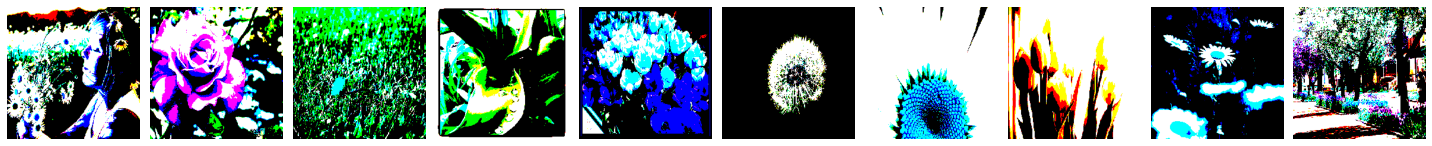

In [13]:
plotImages(imgs)

In [14]:
print(labels)

[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


# Creating model

In [24]:
my_model = Sequential([
    Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", padding = "same",
          input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", padding = "same"),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters = 128, kernel_size = (3,3), activation = "relu", padding = "same"),
    MaxPool2D(pool_size=(2,2), strides=2),Flatten(),
    Dense(units = 5, activation = "softmax")
])

In [25]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)           

In [26]:
my_model.compile(
    optimizer = Adam(learning_rate = 0.0001), loss="categorical_crossentropy", metrics=['accuracy']
)

In [27]:
my_model.fit(
    x = train_batches, 
    steps_per_epoch = len(train_batches),
    validation_steps = len(valid_batches),
    validation_data = valid_batches,
    epochs = 5,
    verbose = 1
)

Epoch 1/5
354/354 [==============================] - 100s 282ms/step - loss: 13.6534 - accuracy: 0.3843 - val_loss: 1.0824 - val_accuracy: 0.6125
Epoch 2/5
354/354 [==============================] - 113s 320ms/step - loss: 0.6717 - accuracy: 0.7609 - val_loss: 0.7026 - val_accuracy: 0.7375
Epoch 3/5
354/354 [==============================] - 142s 401ms/step - loss: 0.2145 - accuracy: 0.9376 - val_loss: 0.8896 - val_accuracy: 0.6875
Epoch 4/5
354/354 [==============================] - 147s 415ms/step - loss: 0.0821 - accuracy: 0.9843 - val_loss: 0.7044 - val_accuracy: 0.7625
Epoch 5/5
354/354 [==============================] - 149s 420ms/step - loss: 0.0197 - accuracy: 0.9982 - val_loss: 0.5677 - val_accuracy: 0.7875


In [31]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)           

# Prediction

In [32]:
predictions = model.predict(
    x = test_batches, 
    steps = len(test_batches), 
    verbose = 1
)

5/5 [==============================] - 0s 72ms/step


In [33]:
predictions

array([[9.34912384e-01, 1.37054455e-03, 1.82309840e-02, 6.98921329e-04,
        4.47871275e-02],
       [8.63387823e-01, 1.35225236e-01, 6.20355480e-04, 1.41375222e-05,
        7.52443913e-04],
       [9.96912479e-01, 3.04036750e-03, 4.63138858e-05, 7.27723148e-07,
        8.01089186e-08],
       [9.95018959e-01, 2.44265446e-03, 2.53374828e-03, 2.55198557e-07,
        4.42812734e-06],
       [9.58603740e-01, 3.34475972e-02, 9.91768786e-04, 2.09458475e-03,
        4.86233318e-03],
       [4.03376848e-01, 5.45324445e-01, 1.03785591e-02, 1.08337672e-02,
        3.00863385e-02],
       [9.60064173e-01, 1.62990633e-02, 1.38634359e-02, 4.02489770e-03,
        5.74837485e-03],
       [9.98661637e-01, 1.05911397e-06, 1.20192883e-03, 1.20368095e-04,
        1.49411790e-05],
       [9.98831213e-01, 6.80059338e-06, 9.80686047e-04, 3.65950882e-07,
        1.80977615e-04],
       [3.31242889e-01, 4.85741884e-01, 3.91616896e-02, 1.40580004e-02,
        1.29795462e-01],
       [2.43235275e-01, 7.5130

In [34]:
np.round(predictions)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0.

In [40]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis = 1))

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[8 2 0 0 0]
 [3 5 0 1 1]
 [3 1 4 1 1]
 [1 0 0 8 1]
 [1 1 3 0 5]]


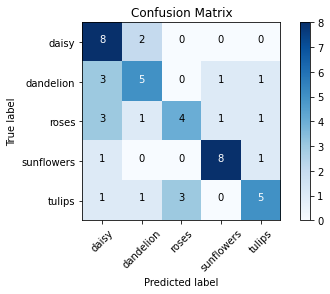

In [43]:
cm_plot_labels = image_classes
plot_confusion_matrix(cm = cm, classes = cm_plot_labels, title="Confusion Matrix")

In [44]:
test_batches.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4])

In [47]:
valid_batches.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [50]:
len(valid_batches)

8